In [ ]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

# **2. Load the Dataset**

In [ ]:
from pandas import read_csv
data = read_csv("Churn_Modelling_1.csv")

# **3.1. Univariate Analysis**

In [ ]:
df=pd.DataFrame(data)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,NaN,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,8387.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,15966.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,NaN,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,12551.82,1,1,1,79084.10,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9a97a15090>]],
      dtype=object)

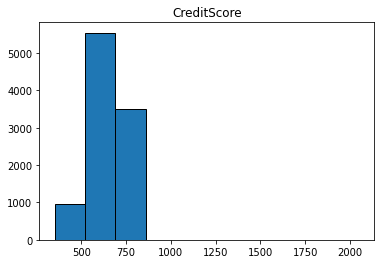

In [ ]:
df.hist(column='CreditScore', grid=False, edgecolor='black')

# **3.2. Bi-Variate Analysis**

In [ ]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

## **There are three ways to use Bi-Variate Analysis**
### 1. Scatterplots
### 2. Correlation Coefficients
### 3. Simple Linear Regression 

Text(0, 0.5, 'Balance')

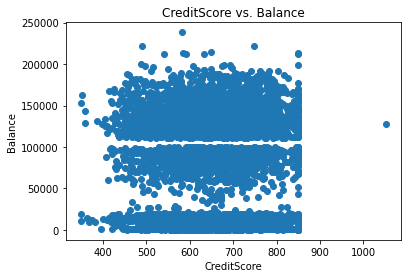

In [ ]:
#1. Scatterplots

plt.scatter(df.CreditScore, df.Balance)
plt.title('CreditScore vs. Balance')
plt.xlabel('CreditScore')
plt.ylabel('Balance')

In [ ]:
#2. Correlation Coefficients

df.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,-0.000104,0.000783,-0.006495,0.022852,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.006785,0.009497,-0.014883,0.005169,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,-0.000104,0.006785,1.000000,-0.006486,0.002820,-0.002128,0.013077,-0.003184,0.025528,-0.001242,-0.026929
Age,0.000783,0.009497,-0.006486,1.000000,-0.009997,-0.000892,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.002820,-0.009997,1.000000,0.008298,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.022852,0.005169,-0.002128,-0.000892,0.008298,1.000000,-0.016715,0.001500,-0.011732,0.021271,-0.016424
NumOfProducts,0.007246,0.016972,0.013077,-0.030680,0.013444,-0.016715,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.003184,-0.011721,0.022583,0.001500,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025528,0.085472,-0.028362,-0.011732,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001242,-0.007201,0.007784,0.021271,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [ ]:
#3. Simple Linear Regression

x=df['CreditScore']
y=df['Age']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4206
Date:                Sat, 24 Sep 2022   Prob (F-statistic):              0.517
Time:                        12:58:13   Log-Likelihood:                -37691.
No. Observations:               10000   AIC:                         7.539e+04
Df Residuals:                    9998   BIC:                         7.540e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          39.3737      0.705     55.875      

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


#**3.3. Multi - Variate Analysis**

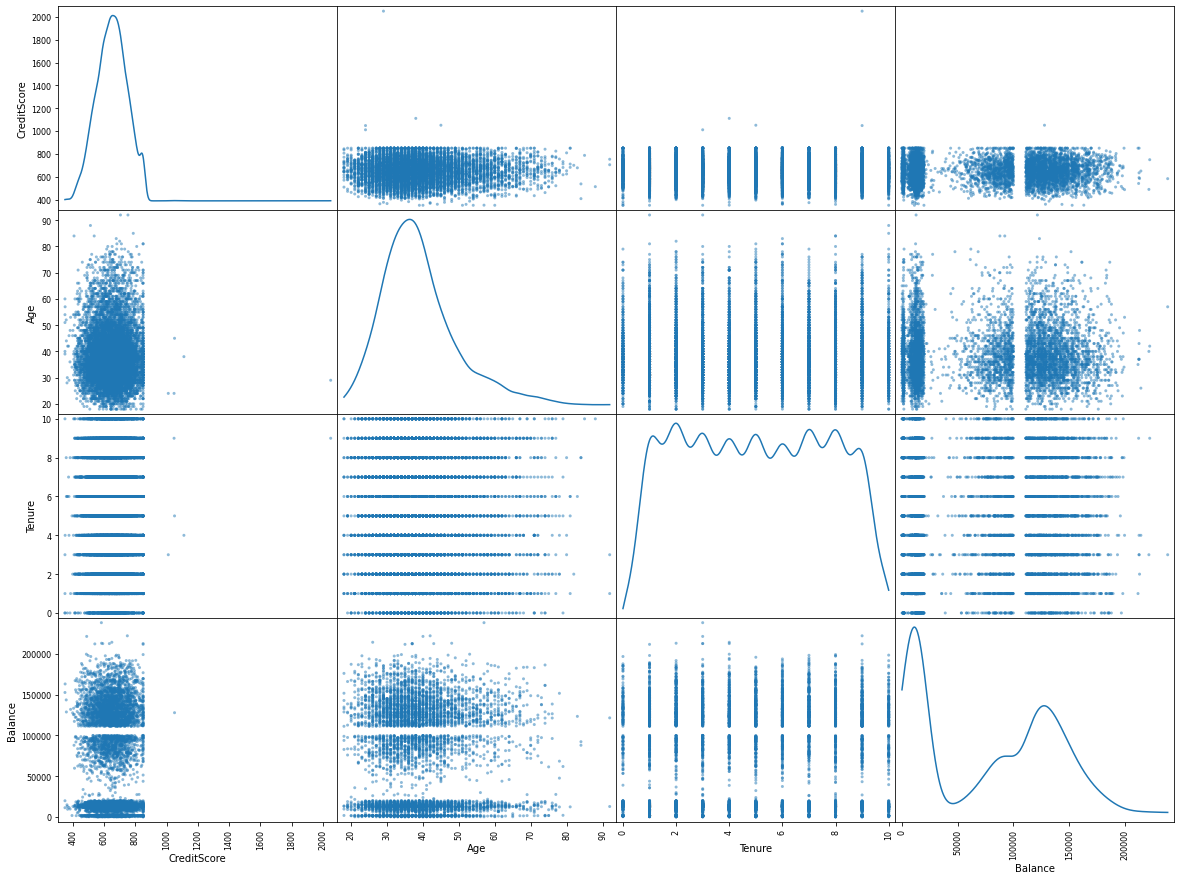

In [ ]:
pd.plotting.scatter_matrix(data.loc[:, "CreditScore":"Balance"], diagonal="kde",figsize=(20,15))
plt.show()

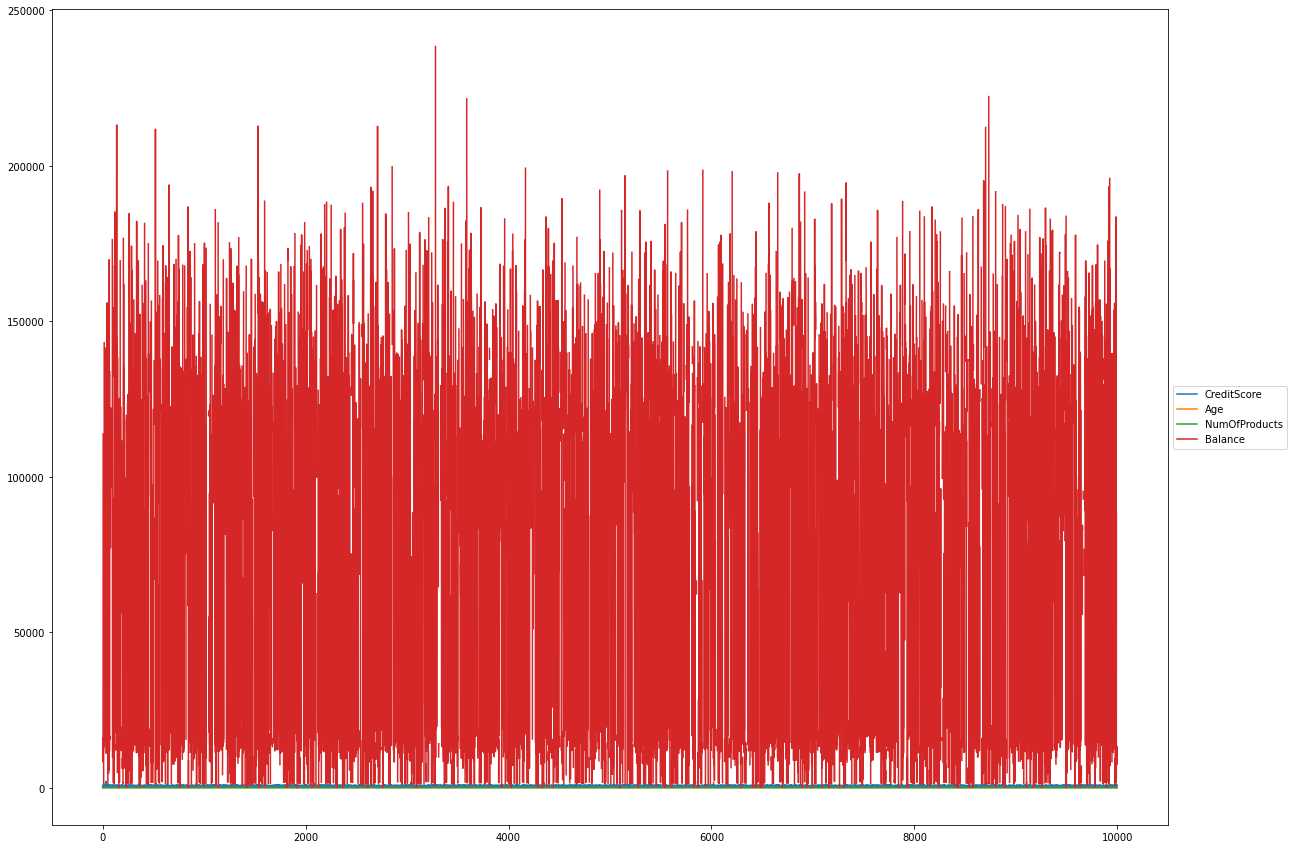

In [ ]:
ax = data[["CreditScore","Age","NumOfProducts","Balance"]].plot(figsize=(20,15))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

#4. Descriptive statistics.

In [ ]:
# Mean
data[["CreditScore","Age","NumOfProducts","Balance"]].mean()

CreditScore        650.862500
Age                 38.921800
NumOfProducts        1.530200
Balance          75345.698833
dtype: float64

In [ ]:
# Median
data[["CreditScore","Age","NumOfProducts","Balance"]].median()

CreditScore        652.00
Age                 37.00
NumOfProducts        1.00
Balance          85225.21
dtype: float64

In [ ]:
# Mode
from collections import Counter
CreditScore = data['CreditScore'].values
data1 = dict(Counter(CreditScore))
mode = [k for k, v in data1.items() if v == max(list(data1.values()))]
mode

[850]

In [ ]:
# Standard Deviation
np.std(CreditScore)

97.96337781921365

# **5. Handle the Missing values.**

In [ ]:
# To find the total number of Missing values
data.isnull().sum().sum() 

3617

## **There are 2 primary ways of handling missing values:**

### 1. Deleting the Missing values
### 2. Imputing the Missing Values

In [ ]:
# 1. Deleting the Missing values
miss=data.dropna(axis=0)
miss.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
# 2. Imputing the Missing Values
# Replace with 0
data['Balance'] = data['Balance'].fillna(0)
data['Balance'].isnull().sum()

0

In [ ]:
# Replace with Mean Value
data['Balance'] = data['Balance'].fillna(data['Balance'].mean())
data['Balance'].isnull().sum()

0

In [ ]:
# Replace with Mode Value
data['Balance'] = data['Balance'].fillna(data['Balance'].mode())
data['Balance'].isnull().sum()

0

# **6. Find the outliers and replace the outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


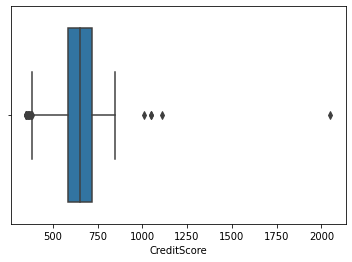

In [ ]:
sns.boxplot(data['CreditScore'])

Here the Points away from the line are Outliers

In [ ]:
print(data['CreditScore'].skew(),"\n")
data['CreditScore'].describe()

0.24223827419975344 



count    10000.000000
mean       650.862500
std         97.968276
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max       2050.000000
Name: CreditScore, dtype: float64

In [ ]:
m=data['CreditScore'].mean()
data['CreditScore'] = np.where(data['CreditScore'] <400.0, m,data['CreditScore'])
data['CreditScore'] = np.where(data['CreditScore'] >999.9, m,data['CreditScore'])
print(data['CreditScore'].skew())
data['CreditScore'].describe()

-0.04112484498895667


count    10000.000000
mean       651.099170
std         95.827971
min        401.000000
25%        584.000000
50%        652.000000
75%        717.250000
max        850.000000
Name: CreditScore, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


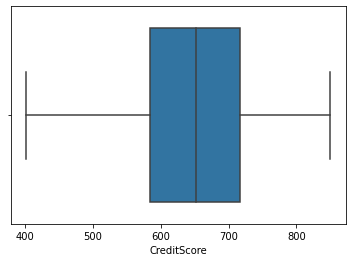

In [ ]:
sns.boxplot(data['CreditScore'])

# **7. Check for Categorical columns and perform encoding.**

In [ ]:
print("Gender:")
print(data["Gender"].value_counts())
print()
print("Number of Products:")
print(data["NumOfProducts"].value_counts())

Gender:
Male      5457
Female    4543
Name: Gender, dtype: int64

Number of Products:
1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64


In [ ]:
data["NumOfProducts"] = np.where(data["Gender"].str.contains("Female"), 1, 0)
data[["NumOfProducts", "Gender"]].head()

,NumOfProducts,Gender
0,1,Female
1,1,Female
2,1,Female
3,1,Female
4,1,Female


# **8. Split the data into dependent and independent variables.**

In [ ]:
# Independent Feature Matrix
A = data.iloc[:, :-1].values
print(A)

[[1 15634602 'Hargrave' ... 1 1 101348.88]
 [2 15647311 'Hill' ... 0 1 112542.58]
 [3 15619304 'Onio' ... 1 0 113931.57]
 ...
 [9998 15584532 'Liu' ... 0 1 42085.58]
 [9999 15682355 'Sabbatini' ... 1 0 92888.52]
 [10000 15628319 'Walker' ... 1 0 38190.78]]


In [ ]:
# Dependent Feature Matrix
B = data.iloc[:, -1].values
print(B)

[1 0 1 ... 1 1 0]


# **9. Scale the independent variables**

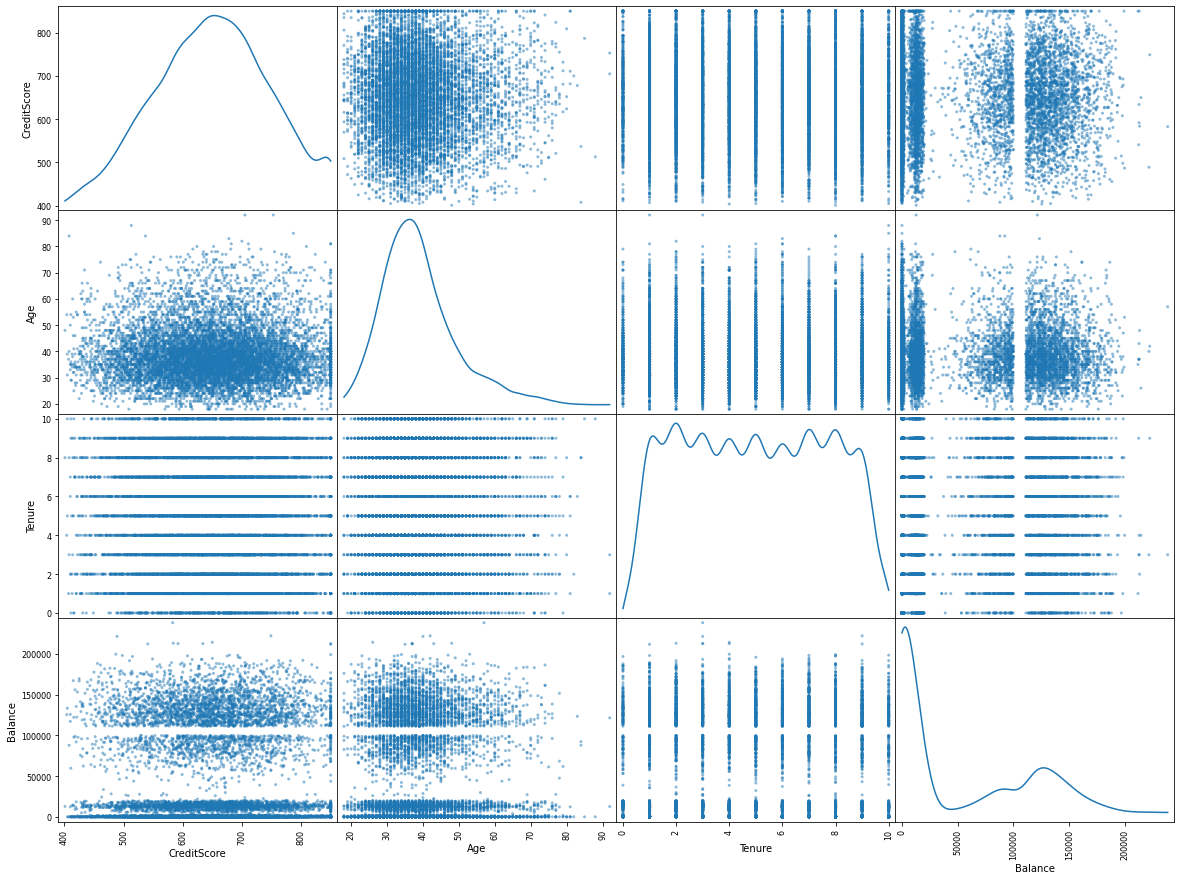

In [ ]:
pd.plotting.scatter_matrix(data.loc[:, "CreditScore":"Balance"], diagonal="kde",figsize=(20,15))
plt.show()

# **10. Split the data into training and testing**

In [ ]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [ ]:
features = ["RowNumber"	,"CustomerId"	,"CreditScore"	,"Age"	,"Tenure"	,"NumOfProducts"	,"HasCrCard"	,"IsActiveMember"	,"EstimatedSalary","Exited"]
X = data.loc[:, features]
y = data.loc[:, ['Balance']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .75)

In [ ]:
reg = DecisionTreeRegressor(max_depth = 2, random_state = 0)
reg.fit(X_train, y_train)
reg.predict(X_test[0:10])

array([45604.71409745, 51003.05526459, 45604.71409745, 45604.71409745,
       45604.71409745, 58377.67831858, 45604.71409745, 45604.71409745,
       51003.05526459, 51003.05526459])

In [ ]:
X_test.head(1)

,RowNumber,CustomerId,CreditScore,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9394,9395,15615753,597.0,35,8,1,1,1,192852.67,0


In [ ]:
reg.predict(X_test.iloc[0].values.reshape(1,-1))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([45604.71409745])